Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Druga laboratorijska vježba - Analiza glavnih komponenti, Faktorska analiza, Multivarijatna linearna regresija, Kanonička korelacijska analiza

**Rok za predaju: 7. svibnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
from linearmodels.system.model import SUR

### 0. Podatkovni skup

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne tjedne cijene ETF-ova (eng. exchange traded fund) koji prate određene dioničke, obvezničke ili druge indekse. Konkretno, radi se o sljedeća 22 fonda:

- `AGG` (iShares Core U.S. Aggregate Bond ETF) - obveznice s američkog tržišta,
- `IEF` (iShares 7-10 Year Treasury Bond ETF) - srednjeročne državne obveznice,
- `LQD` (iShares iBoxx $ Investment Grade Corporate Bond ETF) - korporativne obveznice,
- `SHY` (iShares 1-3 Year Treasury Bond ETF) - kratkoročne državne obveznice,
- `TIP` (iShares TIPS Bond ETF) - državne obveznice zaštićene od inflacije,
- `TLT` (iShares 20+ Year Treasury Bond ETF) - dugoročne državne obveznice,
- `DBC` (Invesco DB Commodity Index Tracking Fund) - sirovine i roba,
- `GLD` (SPDR Gold Trust) - zlato,
- `USO` (United States Oil Fund) - nafta,
- `IJH` (iShares Core S&P Mid-Cap ETF) - dionice tvrtki s američkog tržišta,
- `IWM` (iShares Russell 2000 ETF) - dionice američkih tvrtki s malim kapitalom,
- `SPY` (SPDR S&P 500 ETF Trust) - dionice tvrtki s američkog tržišta,
- `VTV` (Vanguard Value ETF) - dionice tvrtki s američkog tržišta,
- `XLB` (Materials Select Sector SPDR Fund) - dionice tvrtki za materijale,
- `XLE` (Energy Select Sector SPDR Fund) - dionice tvrtki energetskog sektora,
- `XLF` (Financial Select Sector SPDR Fund) - dionice tvrtki financijskog sektora,
- `XLI` (Industrial Select Sector SPDR Fund) - dionice tvrtki industrijskog sektora,
- `XLK` (Technology Select Sector SPDR Fund) - dionice tvrtki iz tehnološkog sektora,
- `XLP` (Consumer Staples Select Sector SPDR Fund) - dionice tvrki za necikličku potrošačku robu,
- `XLU` (Utilities Select Sector SPDR Fund) - dionice tvrtki komunalnih djelatnosti,
- `XLV` (Health Care Select Sector SPDR Fund) - dionice tvrtki iz zdravstvenog sektora,
- `XLY` (Consumer Discretionary Select Sector SPDR Fund) - dionice tvrtki za cikličku potršačku robu,
- `IYR` (iShares U.S. Real Estate ETF) - dionice tvrtki iz područja nekretnina,
- `VNQ` (Vanguard Real Estate Index Fund) - dionice tvrtki iz područja nekretnina.

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, najčešće se koriste povrati: $R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$ gdje je $S(t)$ cijena vrijednosnice u trenutku (tjednu) $t$. 

#### (a)
Podaci se nalaze u datoteci "ETFprices.csv". Učitajte ih, provjerite ispravnost, izračunajte tjedne povrate te vizualizirajte matricu korelacije povrata. U ostatku laboratorijske vježbe također koristite povrate, a ne cijene. 

                  AGG        IEF        LQD        SHY        TIP        TLT  \
Time                                                                           
2006-04-09  65.098267  56.765045  60.709454  65.214424  68.620300  55.092194   
2006-04-16  65.111481  57.075443  60.989243  65.304390  69.292107  55.327076   
2006-04-23  65.323631  57.011932  61.000893  65.361687  69.188210  54.909496   
2006-04-30  65.173912  56.816486  60.832329  65.355927  69.045479  54.758831   
2006-05-07  64.934387  56.540386  60.715195  65.355927  69.115135  54.136620   

                  DBC        GLD        USO        IJH  ...        XLE  \
Time                                                    ...              
2006-04-09  23.188368  59.500000  68.820000  65.633980  ...  42.919556   
2006-04-16  24.197361  63.200001  72.809998  67.693954  ...  45.941833   
2006-04-23  23.716009  65.089996  69.620003  67.358994  ...  43.942360   
2006-04-30  23.790062  67.989998  68.000000  68.388985  ...  45.26510

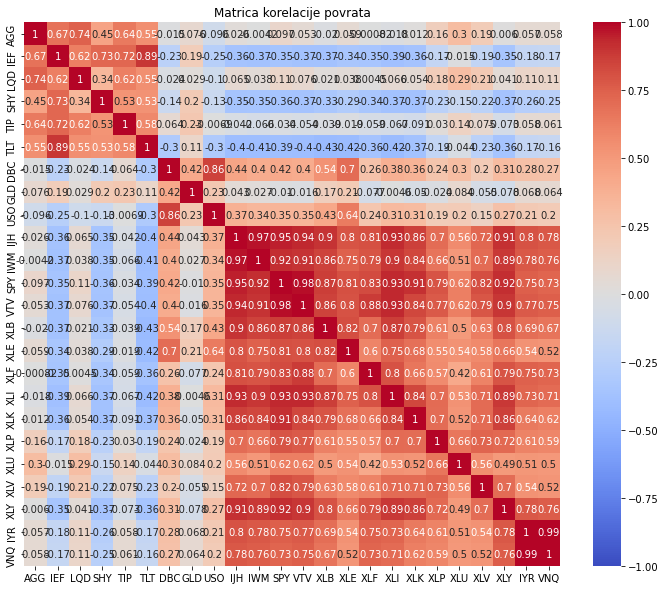

In [2]:
data = pd.read_csv('ETFprices.csv', index_col=0, parse_dates=True)

print(data.head())
print(data.info())

returns = (data - data.shift(1)) / data.shift(1)
returns = returns.dropna()
print(returns)

correlation_matrix = returns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrica korelacije povrata")
plt.show()

### 1. Analiza glavnih komponenti

#### (a) 
Izračunajte glavne komponente matrice korelacije i izračunajte koliki udio varijance objašnjavaju. Odredite broj glavnih komponenti. 

In [3]:
pca = PCA()
pca.fit(correlation_matrix)

explained_variance_ratio = pca.explained_variance_ratio_
print("Udio objašnjene varijance:", explained_variance_ratio)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
threshold = 0.95

n_components = np.where(cumulative_explained_variance >= threshold)[0][0] + 1
print(f"Broj glavnih komponenti za {threshold*100}% kumulativne objašnjene varijance: {n_components}")

Udio objašnjene varijance: [8.90139697e-01 6.75397378e-02 1.51649948e-02 7.85729439e-03
 6.06004402e-03 4.53264846e-03 2.29609206e-03 1.54880716e-03
 1.38303954e-03 9.64181284e-04 7.39199107e-04 6.09661805e-04
 4.47820214e-04 1.78980519e-04 1.51479258e-04 1.22567261e-04
 1.07780545e-04 6.78354060e-05 6.30250792e-05 1.90627707e-05
 4.87318868e-06 9.28321141e-07 2.49731291e-07 2.71573666e-33]
Broj glavnih komponenti za 95.0% kumulativne objašnjene varijance: 2


#### (b)
Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti. Grafički prikažite i usporedite koeficijente prvih nekoliko komponenti.

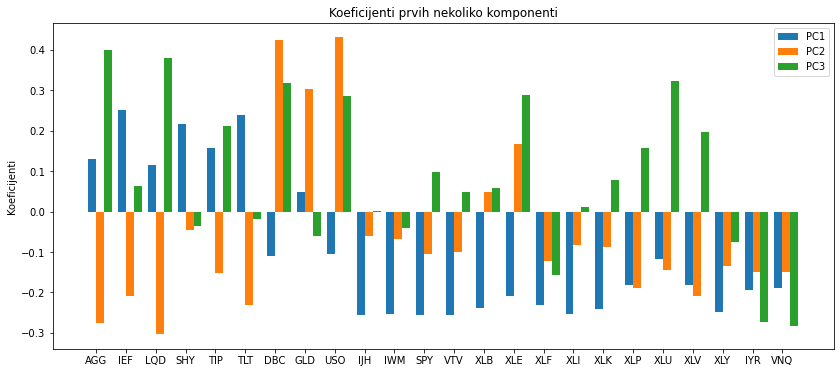

In [4]:
n_components_to_plot = 3

components = pca.components_[:n_components_to_plot]
component_labels = [f"PC{i+1}" for i in range(n_components_to_plot)]
tick_labels = data.columns

fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(tick_labels))
bar_width = 0.8 / n_components_to_plot

for i, component in enumerate(components):
    ax.bar(x + i * bar_width, component, width=bar_width, label=component_labels[i])

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(tick_labels)
ax.set_ylabel("Koeficijenti")
ax.set_title("Koeficijenti prvih nekoliko komponenti")
ax.legend()

plt.show()

#### (c) 
Prikažite graf raspršenja prve dvije glavne komponente i proučite možete li primijetiti neke zanimljive grupe. 


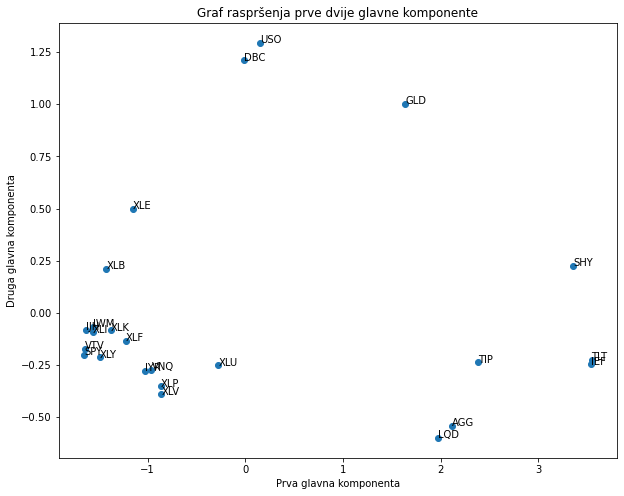

In [5]:
pca_2d = PCA(n_components=2)
projected_returns = pca_2d.fit_transform(correlation_matrix)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(projected_returns[:, 0], projected_returns[:, 1])

for i, ticker in enumerate(data.columns):
    ax.annotate(ticker, (projected_returns[i, 0], projected_returns[i, 1]))

ax.set_xlabel("Prva glavna komponenta")
ax.set_ylabel("Druga glavna komponenta")
ax.set_title("Graf raspršenja prve dvije glavne komponente")

plt.show()

#### (d)
U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji. Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Često je dobro pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:
$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.
Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.
Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:
$R_p = \sum{R_i w_i} = R\cdot w$.
Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve dvije glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta dva svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100). Također izračunajte anualizirane srednje vrijednosti i volatilnosti svojstvenih portfelja.

In [6]:
def scale_eigen_portfolio(eigen_portfolio):
    sign = np.sign(np.sum(eigen_portfolio))
    scaled_portfolio = sign * eigen_portfolio / np.sum(np.abs(eigen_portfolio))
    return scaled_portfolio

scaled_portfolios = [scale_eigen_portfolio(pca.components_[i]) for i in range(2)]

In [7]:
portfolio_returns = np.dot(returns, np.array(scaled_portfolios).T)

In [8]:
initial_value = 100
portfolio_prices = np.cumprod(1 + portfolio_returns, axis=0) * initial_value

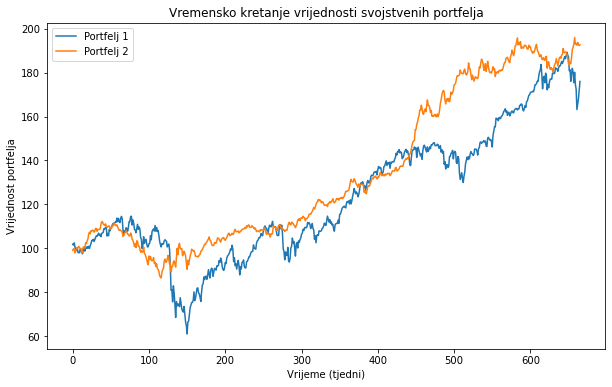

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(portfolio_prices)
ax.set_title("Vremensko kretanje vrijednosti svojstvenih portfelja")
ax.set_xlabel("Vrijeme (tjedni)")
ax.set_ylabel("Vrijednost portfelja")
ax.legend(["Portfelj 1", "Portfelj 2"])

plt.show()

In [10]:
annualized_mean_returns = np.mean(portfolio_returns, axis=0) * 52
annualized_volatility = np.std(portfolio_returns, axis=0) * np.sqrt(52)

print("Anualizirane srednje vrijednosti: ", annualized_mean_returns)
print("Anualizirane volatilnosti: ", annualized_volatility)

Anualizirane srednje vrijednosti:  [0.05422194 0.0540336 ]
Anualizirane volatilnosti:  [0.14155769 0.074728  ]


### 2. Faktorska analiza

#### (a)
Na danim podacima odredite broj faktora te provedite faktorsku analizu pomoću dvije različite metode. Procijenite parametre modela te ih usporedite. Koja procjena Vam se čini bolja? Što možete zaključiti iz vrijednosti faktora? Pronađite procjenu vrijednosti faktora koja daje najbolju interpretabilnost.

In [11]:
eigenvalues, _ = np.linalg.eig(correlation_matrix)
num_factors = np.sum(eigenvalues > 1)
print("Broj faktora prema Kaiserovom kriteriju:", num_factors)

Broj faktora prema Kaiserovom kriteriju: 4


In [12]:
fa_sklearn = FactorAnalysis(n_components=num_factors, random_state=42)
factors_sklearn = fa_sklearn.fit_transform(correlation_matrix)
fa_factor_analyzer = FactorAnalyzer(n_factors=num_factors, rotation=None)
fa_factor_analyzer.fit(correlation_matrix)
factors_factor_analyzer = fa_factor_analyzer.transform(correlation_matrix)
print("Sklearn Factor Analysis faktori:")
print(factors_sklearn)
print("\nFactor Analyzer faktori:")
print(factors_factor_analyzer)

Sklearn Factor Analysis faktori:
[[ 1.01542742 -1.61123888 -0.42225898  1.46825446]
 [ 1.90886507 -0.77291253  0.73766143  0.08692637]
 [ 0.95809771 -1.29790151  0.1637336   1.02536433]
 [ 1.88368126  0.61448611 -0.12329391 -1.49625679]
 [ 1.220267   -0.83062143  0.80407855  1.49363798]
 [ 1.98236488 -0.18813215  0.18422494 -1.54913701]
 [ 0.17380749  2.09978274 -0.77201283  1.63534176]
 [ 1.06522282  2.01203853  0.06723518 -0.58085904]
 [ 0.31937669  2.44154134 -1.27830866  0.47804563]
 [-0.97700045  0.11736886  1.74105078  0.53064199]
 [-0.91533226  0.29589088  1.63382024 -0.13433429]
 [-0.9669622  -0.68608094 -0.57301855  0.31423952]
 [-0.93385313 -0.50265175 -0.54643667  0.00282703]
 [-0.78922339  0.46181983  0.75458     0.6727814 ]
 [-0.60812992  0.5355757  -0.51917294  1.77830499]
 [-0.64126259  0.14192725 -0.33581448 -1.60971544]
 [-0.87925139 -0.0287126   0.11799656 -0.42661959]
 [-0.78412439 -0.24583651 -0.7755655  -0.66324533]
 [-0.46823875 -0.881473   -1.71190283 -0.70985843

#### (b)
Izračunajte specifične varijance faktora za model s dva faktora i model s tri faktora. Pomoću stupčastog dijagrama prikažite i usporedite dobivene vrijednosti. 

In [13]:
fa_two_factors = FactorAnalyzer(n_factors=2, rotation='varimax')
fa_two_factors.fit(correlation_matrix)

fa_three_factors = FactorAnalyzer(n_factors=3, rotation='varimax')
fa_three_factors.fit(correlation_matrix)

specific_variances_two_factors = fa_two_factors.get_communalities()
specific_variances_three_factors = fa_three_factors.get_communalities()

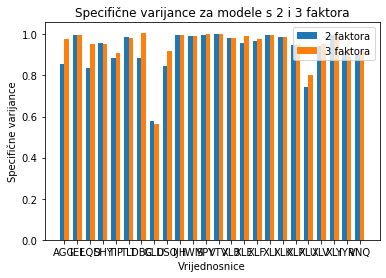

In [14]:
index = np.arange(len(specific_variances_two_factors))
bar_width = 0.35

plt.bar(index, specific_variances_two_factors, bar_width, label="2 faktora")
plt.bar(index + bar_width, specific_variances_three_factors, bar_width, label="3 faktora")

plt.xlabel('Vrijednosnice')
plt.ylabel('Specifične varijance')
plt.title('Specifične varijance za modele s 2 i 3 faktora')
plt.xticks(index + bar_width / 2, data.columns)
plt.legend()

plt.show()

### 3. Multivarijatna linearna regresija

#### (a)
Provedite 3 univarijatne linearne regresije koristeći povrate ETF-ova `AGG`, `DBC` i `SPY` kao zavisne varijable. Svaku regresiju provedite sa svim preostalim povratima ETF-ova kao nezavnim varijablama. Za svaku regresiju ispišite koeficijente te njihovu signifikantnost.

In [15]:
dependent_etfs = ['AGG', 'DBC', 'SPY']
independent_etfs = [etf for etf in data.columns if etf not in dependent_etfs]

for dep_etf in dependent_etfs:
    X = returns[independent_etfs]
    y = returns[dep_etf]

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    print(f"Rezultati regresije za {dep_etf}:")
    print(model.summary())
    print("\n")

Rezultati regresije za AGG:
                            OLS Regression Results                            
Dep. Variable:                    AGG   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     73.11
Date:                Sun, 07 May 2023   Prob (F-statistic):          8.26e-155
Time:                        23:49:19   Log-Likelihood:                 2777.2
No. Observations:                 666   AIC:                            -5510.
Df Residuals:                     644   BIC:                            -5411.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.802e-05   

C:\Users\Krogg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Krogg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Krogg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### (b)
Provedite multivarijatnu linearnu regresiju koristeći ETF-ove `AGG`, `DBC` i `SPY` kao zavisne varijable. Za nezavisne varijable uzmite sve preostale ETF-ove. Ispišite signifikantnost koeficijenata multivarijatne regresije. 

In [16]:
dependent_etfs = ['AGG', 'DBC', 'SPY']
independent_etfs = [etf for etf in data.columns if etf not in dependent_etfs]

X = returns[independent_etfs]
Y = returns[dependent_etfs]

X = sm.add_constant(X)

model = SUR.multivariate_ls(Y, X).fit()
print(model.summary)

C:\Users\Krogg\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                           System OLS Estimation Summary                           
Estimator:                        OLS   Overall R-squared:                   0.9017
No. Equations.:                     3   McElroy's R-squared:                 0.9844
No. Observations:                 666   Judge's (OLS) R-squared:             0.9017
Date:                Sun, May 07 2023   Berndt's R-squared:                  0.9997
Time:                        23:49:19   Dhrymes's R-squared:                 0.9017
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const      -5.802e-05     0.0002    -0.3058     0.7598     -0.0004      0.0003
IEF         

#### (c)
Ponovite proceduru iz (b), ali zadržite samo varijable s koeficijentima na 0.05 razini signifikantnosti. Usporedite ovaj model s modelom iz (b).  Je li izbacivanje varijabli dovelo do pogoršanja modela?


In [17]:
significant_vars = []
pvalues = model.pvalues
for col in pvalues.index:
    if pvalues[col] < 0.05:
        significant_vars.append(col)

significant_vars = list(set(significant_vars))
significant_vars = [var.replace('AGG_', '').replace('DBC_', '').replace('SPY_', '') for var in significant_vars]

independent_etfs = [col for col in independent_etfs if col in significant_vars]

X = returns[independent_etfs]
Y = returns[dependent_etfs]               
significant_model = SUR.multivariate_ls(Y, X).fit()
print(significant_model.summary)

print("Originalni model:")
print(model.summary)
print("\nModel s varijablama signifikantnima na 0.05 razini:")
print(significant_model.summary)

                           System OLS Estimation Summary                           
Estimator:                        OLS   Overall R-squared:                   0.9009
No. Equations.:                     3   McElroy's R-squared:                 0.9834
No. Observations:                 666   Judge's (OLS) R-squared:             0.9006
Date:                Sun, May 07 2023   Berndt's R-squared:                  0.9997
Time:                        23:49:19   Dhrymes's R-squared:                 0.9008
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
IEF            0.3067     0.0646     4.7504     0.0000      0.1802      0.4332
LQD         

                           System OLS Estimation Summary                           
Estimator:                        OLS   Overall R-squared:                   0.9009
No. Equations.:                     3   McElroy's R-squared:                 0.9834
No. Observations:                 666   Judge's (OLS) R-squared:             0.9006
Date:                Sun, May 07 2023   Berndt's R-squared:                  0.9997
Time:                        23:49:19   Dhrymes's R-squared:                 0.9008
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
IEF            0.3067     0.0646     4.7504     0.0000      0.1802      0.4332
LQD         

### 4. Kanonička korelacijska analiza

Za potrebe ovog zadatka standardizirajte podatke i podijelite skup ETF-ova na dva skupa tako da: 
- prvi skup sadrži: `AGG`, `LQD`, `TIP` ,`DBC`, `USO`,`IWM`, `VTV`, `XLE`, `XLI`, `XLP`, `XLV`, `IYR`,  
- drugi skup sadrži: `IEF`, `LQD`, `SHY`, `TLT`, `GLD`, `IJH`,`SPY`, `XLB`, `XLF`, `XLK`, `XLU`,`XLY`, `VNQ`.


In [18]:
scaler = StandardScaler()
standardized_returns = scaler.fit_transform(returns)

standardized_returns_df = pd.DataFrame(standardized_returns, columns=data.columns)

group1 = ['AGG', 'LQD', 'TIP', 'DBC', 'USO', 'IWM', 'VTV', 'XLE', 'XLI', 'XLP', 'XLV', 'IYR']
group2 = ['IEF', 'LQD', 'SHY', 'TLT', 'GLD', 'IJH', 'SPY', 'XLB', 'XLF', 'XLK', 'XLU', 'XLY', 'VNQ']

group1_data = standardized_returns_df[group1]
group2_data = standardized_returns_df[group2]

#### (a) 
Provedite kanoničku korelacijsku analizu s maksimalnim brojem parova kanoničkih varijabli. Koliko kanoničkih parova je statistički značajno? 

In [19]:
n_pairs = min(group1_data.shape[1], group2_data.shape[1])
print(n_pairs)

cca = CCA(n_components=n_pairs)
cca.fit(group1_data, group2_data)

canonical_correlations = cca.score(group1_data, group2_data)

print(f"Kanoničke korelacije: {canonical_correlations}")

12
Kanoničke korelacije: 0.5912255861220921


#### (b)
Pomoću *scree plota* prikažite korelacije dobivenih parova kanoničkih varijabli. 

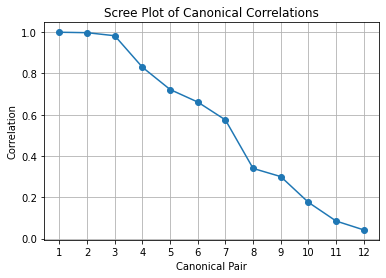

In [20]:
group1_canonical, group2_canonical = cca.transform(group1_data, group2_data)

correlations = np.array([np.corrcoef(group1_canonical[:, i], group2_canonical[:, i])[0, 1] for i in range(n_pairs)])

plt.plot(np.arange(1, n_pairs + 1), correlations, marker='o')
plt.title('Scree Plot of Canonical Correlations')
plt.xlabel('Canonical Pair')
plt.ylabel('Correlation')
plt.xticks(np.arange(1, n_pairs + 1))
plt.grid()
plt.show()

#### (c)
Promotrite korelacije između kanoničkih varijabli i originalnih varijabli kako bi interpretirali kanoničke varijable u terminima originalnih. Za svaki skup posebno pomoću stupčastog dijagrama prikažite korelacije originalnih varijabli i prva tri para kanoničkih varijabli (slično kao u zadatku 1.(b)). 

**Hint**: Interpretacija populacijskih kanoničkih varijabli (Predavanje 7)

C:\Users\Krogg\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:97: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached',


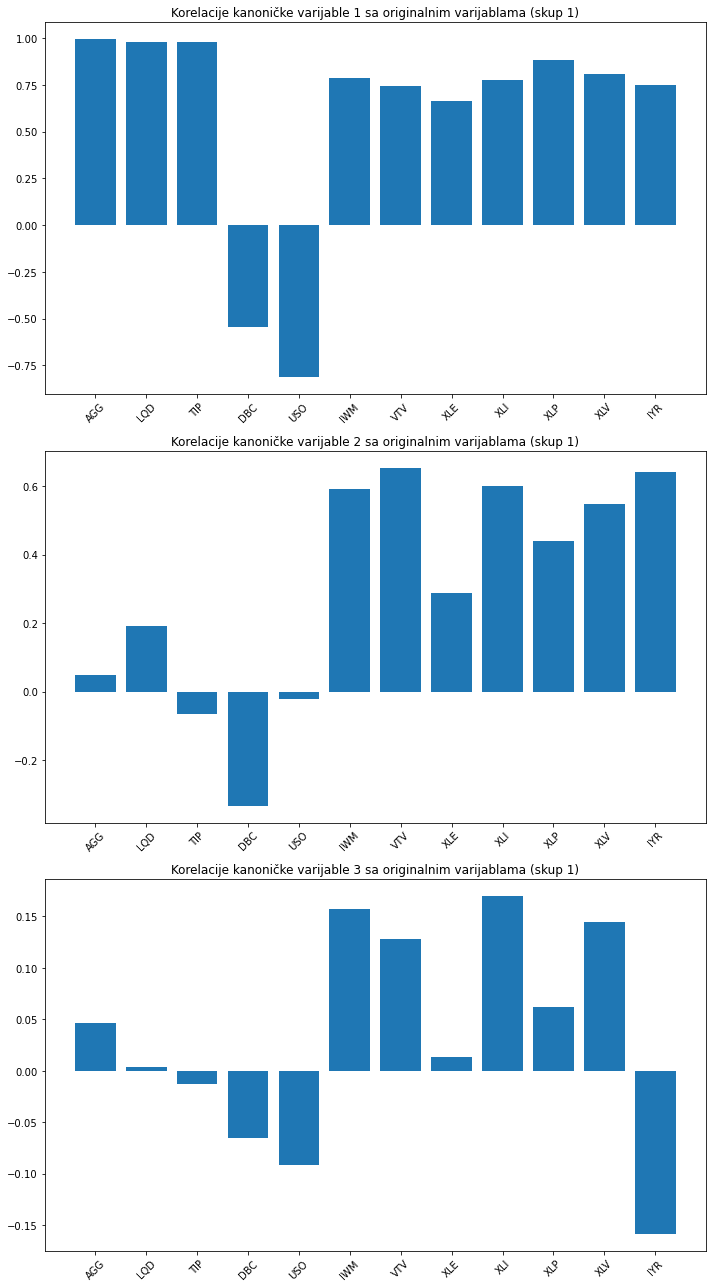

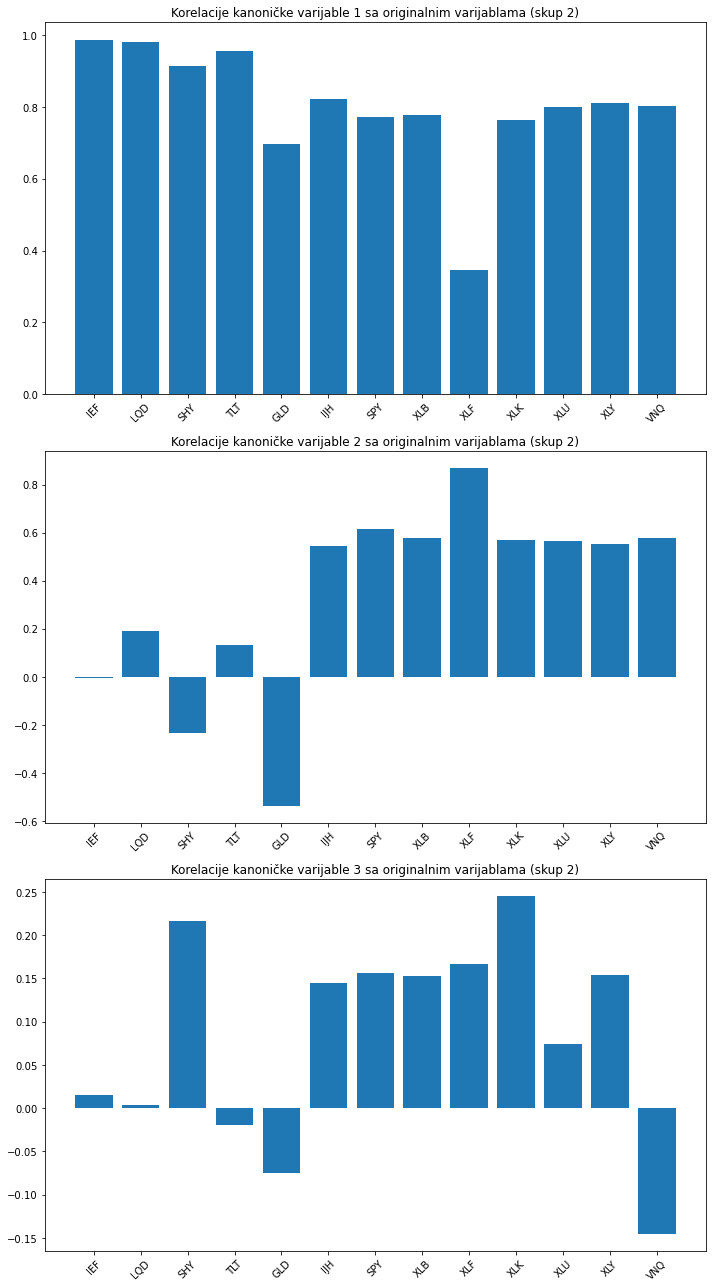

In [21]:
normalized_data = (data - data.mean()) / data.std()

group1_etfs = ['AGG', 'LQD', 'TIP', 'DBC', 'USO', 'IWM', 'VTV', 'XLE', 'XLI', 'XLP', 'XLV', 'IYR']
group2_etfs = ['IEF', 'LQD', 'SHY', 'TLT', 'GLD', 'IJH', 'SPY', 'XLB', 'XLF', 'XLK', 'XLU', 'XLY', 'VNQ']

group1_data = normalized_data[group1_etfs]
group2_data = normalized_data[group2_etfs]

cca = CCA(n_components=3)
cca.fit(group1_data, group2_data)

X_c, Y_c = cca.transform(group1_data, group2_data)
group1_correlations = np.corrcoef(X_c.T, group1_data.T)[:3, 3:]
group2_correlations = np.corrcoef(Y_c.T, group2_data.T)[:3, 3:]

def plot_correlations(correlations, group_etfs, group_num):
    n_canonical_vars = correlations.shape[0]
    n_etfs = len(group_etfs)

    fig, axes = plt.subplots(n_canonical_vars, 1, figsize=(10, 6 * n_canonical_vars))

    for i in range(n_canonical_vars):
        axes[i].bar(range(n_etfs), correlations[i])
        axes[i].set_xticks(range(n_etfs))
        axes[i].set_xticklabels(group_etfs, rotation=45)
        axes[i].set_title(f'Korelacije kanoničke varijable {i + 1} sa originalnim varijablama (skup {group_num})')

    plt.tight_layout()
    plt.show()

plot_correlations(group1_correlations, group1_etfs, 1)
plot_correlations(group2_correlations, group2_etfs, 2)